# Sentiment Classification Using Logistic Regression
In this lab, you will implement a logistic regression classifier with hand-engineered features to predict the sentiment of hotel reviews

# Outline

- [1 - Packages](#1---Packages)
- [2 - Problem Statement](#2---Problem-Statement)
- [3 - Dataset](#3---Dataset)
    - [3.1 - Load and View the data](#3.1---View-the-data)
    - [3.2 - Label Distribution](#3.2---Label-Distribution)
         - [Exercise 1](#Exercise-1)
    - [3.3 - Training and Development Sets](#3.3---Split-Training-and-Development-Sets)
- [4 - Random Classifier](#4---Random-Classifier)
    - [4.1 - Random Classifier](#4.1---Random-Classifier)
        - [Exercise 2](#Exercise-2)
    - [4.2 - Text Preprocessing](#4.2---Text-Preprocessing)
        - [Exercise 3](#Exercise-3)
- [5 - Evaluation Metrics](#5---Evaluation-Metrics)
    - [5.1 - Accuracy, Precision, Recall and F1 score](#5.1---Accuracy,-Precision,-Recall-and-F1-score)
        - [Exercise 4](#Exercise-4)
- [6 - Logistic Regression](#6---Logistic-Regression)
    - [6.1 - Feauture Extraction](#6.1---Feature-Extraction)
        - [Exercise 5](#Exercise-5)
    - [6.2 - Feature Scaling](#6.2---Standardization-of-Features)
        - [Exercise 6](#Exercise-6)
    - [6.3 - Training a Logistic Regression Classifier](#6.3---Training-a-Logistic-Regression-Classifier)
    - [6.4 - Weight Initialization](#6.4---Weight-Initialization)
        - [Exercise 7](#Exercise-7)
    - [6.5 - Logistic Loss Function](#6.5---Logistic-Loss-Function)
        - [Exercise 8](#Exercise-8)
    - [6.6 - SGD Optimizer](#6.6---SGD-Optimizer)
    - [6.7 - Converting Logits into Predictions](#6.7---Converting-Logits-into-Predictions)
        - [Exercise 9](#Exercise-9)
    - [6.8 - Training Function](#6.8---Training-Function)
    - [6.9 - Train the Classifier](#6.9---Train-the-Classifier)
- [7 - Predict on the Test Set](#7---Predict-on-the-Test-Set)
    - [Exercise 10](#Exercise-10)

# 1 - Packages

First, let's run the cell below to import all the packages that you will need during this assignment.

- numpy
- random
- spacy
- torch

We have provided a `util.py` file for loading the data, and some of the basic modeling. While this file is already complete, we suggest browsing the script to see how some of the data loading and modeling works. Your task is to fill in the functions below in order to train as accurate a classifier as possible! 

In [1]:
import numpy as np
import random
import spacy
import torch
from typing import List
from util import *

2025-09-27 06:46:43.598349: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 2 - Problem Statement
For this assignment we will be implementing a naive bayes baseline classifier. Additionally, we will be using pytorch to implement a binary logistic regression classifier. Our task is sentiment classification for hotel reviews. The input to your model will be a text review, and the output label is a 1 or 0 marking it as positive or negative.

# 3 - Dataset

The training data for this task consists of a collection of short hotel reviews. The data is formatted as one review per line. Each line starts with a unique identifier for the review (as in ID-2001) followed by tab and the text of the review.  The reviews are not tokenized or sentence segmented in any way (the words are space separated). The positive reviews and negative reviews appear in separate files namely [hotelPosT-train.txt](data/hotelPosT-train.txt) and [hotelNegT-train.txt](data/hotelNegT-train.txt).

Let's run the cell below to load the dataset:

In [2]:
# load the dataset
pos_datapath = "data/hotelPosT-train.txt"
neg_datapath = "data/hotelNegT-train.txt"
all_texts, all_labels = load_train_data(pos_datapath, neg_datapath)

### 3.1 - View the data
Before starting on any task, it is useful to get more familiar with your dataset. A good place to start is to print out the data points and see what it contains.

The code below randomly selects a positive and a negative sample from the `all_texts` and prints them.

In [3]:
# print pos and neg examples from all_texts
def random_sample(texts, labels, label):
    data_by_label = {}
    for lab, text in zip(labels, texts):
        if lab not in data_by_label:
            data_by_label[lab] = []
        data_by_label[lab].append(text)
    return random.choice(data_by_label[label])

print("--- Positive Example ---")
print(random_sample(all_texts, all_labels, label=1))
print("\n--- Negative Example ---")
print(random_sample(all_texts, all_labels, label=0))

--- Positive Example ---
My husband and I stayed at the Marriott Fairfield Inn and Suites in downtown Louisville, Kentucky a few weekends ago. The hotel was conveniently located right off I-65 and the hotel provided adequate parking. We arrived before check-in but our room was ready for us. Room decor is modern and colorful and I liked that the bath and lavatory were separate. The hotel was quiet and clean and the complimentary breakfast was one of the best I've had at a hotel -- fresh fruit, homemade waffles, bacon and eggs, etc, etc. Would definitely stay again if travelling to the area.

--- Negative Example ---
I hate that motel is cheap noisy very load barly change sheets, ppl tent to break into cars and they barly do anything bout it just sucks...


### 3.2 - Label Distribution

#### Exercise 1
It is important to know the distribution of the training examples. More often than not, you will have to work with datasets that are not "balanced" with respect to the labels of the samples. For this task, print out the number of examples that have label = 1 and label = 0, respectively, in std:out or plot a pie chart.

In [4]:
def label_distribution(labels):
    """
    Get the label counts in the dataset
    
    Args:
        labels (List[int]): Labels for the dataset. 1 = postive, 0 = negative
    
    Returns
        pos_count, neg_count (int, int): The counts of each label
    """
    # You need to return these variables correctly
    pos_count = 0
    neg_count = 0
    
    # your code here
#     raise NotImplementedError

    pos_count = sum(1 for lab in labels if lab == 1)
    neg_count = sum(1 for lab in labels if lab == 0)

    return pos_count, neg_count

In [5]:
"""Check that the function label_distribution works correctly"""
assert label_distribution([1, 1, 0]) == (2, 1)
assert label_distribution([0, 0, 0]) == (0, 3)
assert label_distribution([1, 1]) == (2, 0)
print('All Test Cases Have Passed!')

All Test Cases Have Passed!


### 3.3 - Split Training and Development Sets
For the purpose of coming with the best parameters for the model you will have to split the dataset into training and development sets. Make sure the splits follow the same distribution.

#### Test set
The hidden test dataset is the data that you will need to use to report the results on. This set is the *unseen* dataset, meaning you are not in *any way* supposed to look what is in this dataset. Thus, we have hidden code in the last few modules that will test your code on the hidden test set.

In [6]:
from sklearn.model_selection import train_test_split

def split_dataset(texts, labels):
    """
    Split the dataset randomly into 80% training and 20% development set
    Make sure the splits have the same label distribution
    """    
    tr_texts, de_texts, tr_labels, de_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)
    return tr_texts, tr_labels, de_texts, de_labels

train_texts, train_labels, dev_texts, dev_labels = split_dataset(all_texts, all_labels)

print('Train Label Distribution:')
print(label_distribution(train_labels))

print('Dev Label Distribution:')
print(label_distribution(dev_labels))

Train Label Distribution:
(76, 75)
Dev Label Distribution:
(19, 19)


# 4 - Random Classifier
It is important to come up with baselines for the classifications to compare the more complicated models with. The baselines are also useful as a debugging method for your actual classfication model. You will create a baseline that scores input on random chance.

### 4.1 - Random Classifier
#### Exercise 2

A random chance classifier predicts the label according to the label's distribution. As an example, if the label 1 appears 70% of the times in the training set, you predict 70 out of 100 times the label 1 and label 0 30% of the time. Thus, the classifier does not need to see the actual text because it makes its decision based on the training labels alone.

In [7]:
def predict_random(train_labels, num_samples):
    """
    Using the label distribution, predict the label num_sample number of times
    
    Args:
        train_labels np.ndarray(int)
        num_samples: int
    Returns:
        predictions np.ndarray(int, num_samples)
    """
    predictions = []
    # your code here
#     raise NotImplementedError

    pos_ratio = sum(1 for lab in train_labels if lab == 1) / len(train_labels)
    neg_ratio = 1 - pos_ratio

    for _ in range(num_samples):
        r = random.random()
        if r < pos_ratio:
            predictions.append(1)
        else:
            predictions.append(0)


    return np.array(predictions, dtype=int)
    

In [8]:
rc_labels = np.array([1]*10 + [0]*5, dtype=int)
rc_predictions = predict_random(rc_labels, 3)
assert len(rc_predictions) == 3
assert len(set(rc_predictions).difference({0, 1})) == 0


### 4.2 - Text Preprocessing

In most NLP tasks, the first step toward preprocessing the data is to tokenize the text. In this case, we will assume tokens are simply separated by whitespace and tokenize according to that assumption. We will also convert every character to lowercase.

#### Exercise 3

Implement the preprocess function, which takes a string of text and tokenizes by whitespace and converts all tokens to lowercase.

In [9]:
def preprocess(text):
    """
    Takes a string of text and returns a list of the whitespace-separated and lowercased tokens.
    """
    # your code here
#     raise NotImplementedError

    tokens = text.lower().split()

    return tokens

In [10]:
test_string = "This sentence needs to be preprocessed."

assert preprocess(test_string) == ['this', 'sentence', 'needs', 'to', 'be', 'preprocessed.']


print('All Test Cases Passed!')

All Test Cases Passed!


# 5 - Evaluation Metrics

Implement the evaulation metrics: Accuracy, Precision, Recall and F1 score

### 5.1 - Accuracy, Precision, Recall and F1 score

### Exercise 4

In [11]:
# Implement the evaluation metrics that we will use to assess our models

def accuracy(predicted_labels, true_labels):
    """
    Accuracy is correct predictions / all predicitons
    
    Args:
        predicted_labels (np.ndarray[int, 1]): the integer labels from the predictions. Uni-dimensional
        true_labels (np.ndarray[int, 1]): the integer labels from the gold standard. Uni-dimensional
    
    Returns:
        accuracy_value (double)
        
    """
    accuracy_value = 0.
    
    # your code here
#     raise NotImplementedError
    predicted_labels = np.asarray(predicted_labels).ravel()
    true_labels = np.asarray(true_labels).ravel()
    accuracy_value = float(np.mean(predicted_labels == true_labels)) if true_labels.size > 0 else 0.0

    
    return accuracy_value

def precision(predicted_labels, true_labels):
    """
    Precision is True Positives / All Positives Predictions
    
    Args:
        predicted_labels (np.ndarray[int, 1]): the integer labels from the predictions. Uni-dimensional
        true_labels (np.ndarray[int, 1]): the integer labels from the gold standard. Uni-dimensional
    
    Returns:
        precision_value (double)
        
    """
    precision_value = 0.
    
    # your code here
#     raise NotImplementedError
    predicted_labels = np.asarray(predicted_labels).ravel()
    true_labels = np.asarray(true_labels).ravel()
    tp = int(np.sum((predicted_labels == 1) & (true_labels == 1)))
    fp = int(np.sum((predicted_labels == 1) & (true_labels == 0)))
    precision_value = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    
    return precision_value

def recall(predicted_labels, true_labels):
    """
    Recall is True Positives / All Positive Labels
    
    Args:
        predicted_labels (np.ndarray[int, 1]): the integer labels from the predictions. Uni-dimensional
        true_labels (np.ndarray[int, 1]): the integer labels from the gold standard. Uni-dimensional
    
    Returns:
        recall_value (double)
        
    """
    recall_value = 0.
    
    # your code here
#     raise NotImplementedError
    predicted_labels = np.asarray(predicted_labels).ravel()
    true_labels = np.asarray(true_labels).ravel()
    tp = int(np.sum((predicted_labels == 1) & (true_labels == 1)))
    fn = int(np.sum((predicted_labels == 0) & (true_labels == 1)))
    recall_value = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    
    return recall_value

def f1_score(predicted_labels, true_labels):
    """
    F1 score is the harmonic mean of precision and recall
    
    Args:
        predicted_labels (np.ndarray[int, 1]): the integer labels from the predictions. Uni-dimensional
        true_labels (np.ndarray[int, 1]): the integer labels from the gold standard. Uni-dimensional
    
    Returns:
        f1_score_value (double)
        
    """
    f1_score_value = 0.
    
    # your code here
#     raise NotImplementedError
    predicted_labels = np.asarray(predicted_labels).ravel()
    true_labels = np.asarray(true_labels).ravel()
    tp = int(np.sum((predicted_labels == 1) & (true_labels == 1)))
    fp = int(np.sum((predicted_labels == 1) & (true_labels == 0)))
    fn = int(np.sum((predicted_labels == 0) & (true_labels == 1)))
    p = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    r = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1_score_value = (2 * p * r / (p + r)) if (p + r) > 0 else 0.0

    return f1_score_value

In [12]:
em_test_labels = np.array([0]*6 + [1]*4, dtype=int)
em_test_predictions = np.array([0]*8 + [1]*2, dtype=int)

em_test_accuracy = 0.8
em_test_precision = 1.0
em_test_recall = 0.5
em_test_f1 = 2/3

assert accuracy(em_test_predictions, em_test_labels) == em_test_accuracy
assert precision(em_test_predictions, em_test_labels) == em_test_precision 
assert recall(em_test_predictions, em_test_labels) == em_test_recall
assert f1_score(em_test_predictions, em_test_labels) == em_test_f1


print('All Test Cases Passed!')

All Test Cases Passed!


# 6 - Logistic Regression

Now let's try building a logistic regression based classifier on hand-engineered features.

The following tasks are going to be the implementation of the components required in building a Logistic Regressor.

### 6.1 - Feature Extraction
#### Exercise 5
In class, we went over how to featurize text for a classification system for sentiment analysis. In this assignment, you should implement and build upon this to accuractely classify the hotel reviews.

This task requires a thorough understanding of the dataset to answer the important question, "What is in the data?". Please go through some of the datapoints and convert the signals that you think might help in identifying "sentiment" as features.

Please refer to the below table to implement feature extraction for this task:

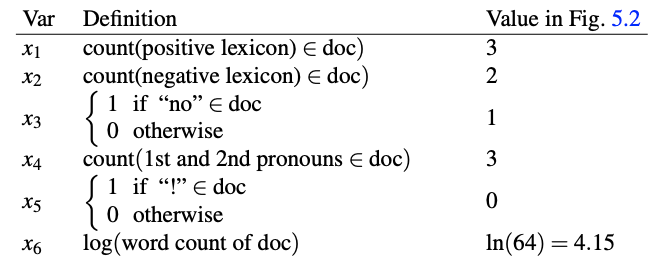

Please use the files with postive and negative words attached in the assignment: [positive_words.txt](data/poisitive-words.txt) and  [negative_words.txt](data/negative-words.txt)

In [15]:
# Implement the extraction of above features from text

# The following may be helpful:
FIRST_PER_PRONOUNS = ['i', 'my', 'mine', 'me']
SECOND_PER_PRONOUNS = ['you', 'your', 'yours']

# Read in positive and negative words from the text files
path_to_positives = "data/positive-words.txt"
path_to_negatives = "data/negative-words.txt"
positive_words, negative_words = [], []
with open(path_to_positives, "r") as file:
    for line in file:
        text = line.rstrip()
        positive_words.append(text)
with open(path_to_negatives, "r") as file:
    for line in file:
        text = line.rstrip()
        negative_words.append(text)

def get_positive_tokens(text):
    positive_tokens_found = [token for token in text if token in positive_words]
    return len(positive_tokens_found)

# your code here
# raise NotImplementedError


def get_negative_tokens(text):
    negative_tokens_found = [token for token in text if token in negative_words]
    return len(negative_tokens_found)

def extract_features(text):
    features = []
    features.append(get_positive_tokens(text))
    # TODO: Add more features to the feature vector
    # your code here
#     raise NotImplementedError

    neg_count = get_negative_tokens(text)
    qmark_count = sum(tok.count('?') for tok in text)
    comma_count = sum(tok.count(',') for tok in text)
    exclam_count = sum(tok.count('!') for tok in text)
    length_log = float(np.log(len(text))) if len(text) > 0 else 0.0

    features.extend([neg_count, qmark_count, comma_count, exclam_count, length_log])

    return features

def featurize_data(texts, labels):
    features = [
        extract_features(preprocess(text)) for text in texts
    ]
    return torch.FloatTensor(features), torch.FloatTensor(labels)

In [16]:
test_string = "It's hokey . There are virtually no surprises , and the writing is second-rate . So why was it so enjoyable ? For one thing , the cast is great . Another nice touch is the music . I was overcome with the urge to get off the couch and start dancing . It sucked me in , and it'll do the same to you ."
test_string_features, dummy_label = featurize_data([test_string], [1])

assert test_string_features.ravel().tolist() == [3.0, 1.0, 1.0, 3.0, 0.0, 4.18965482711792]

print('Test case passed!')

Test case passed!


### 6.2 - Standardization of Features
#### Exercise 6

In this task we will use the data standardization technique found in the SGD slides to ensure the scales of the feature are consistent. After featurizing the dataset, we need to call the following function before passing it to the classifier.

##### Standardization Formula

For an n x m matrix X:

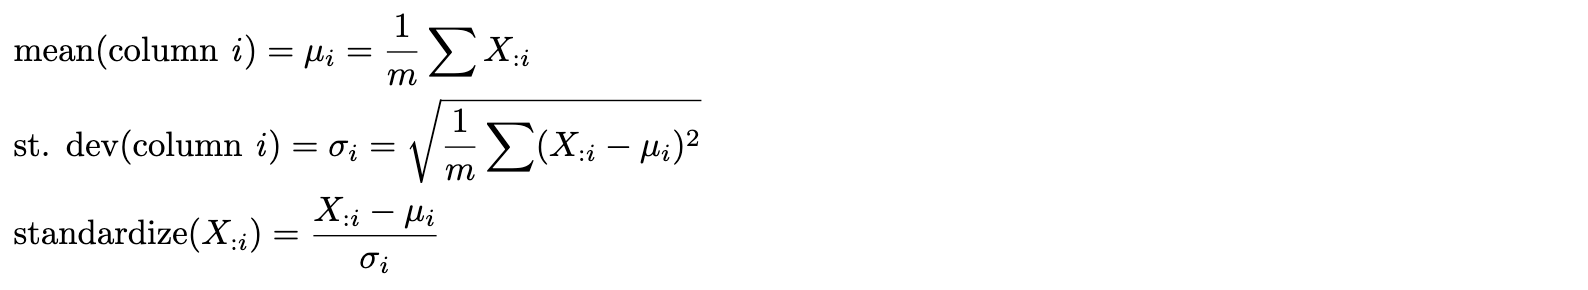

In [26]:
def standardize(features: torch.Tensor) -> torch.Tensor:
    """
    Return the features transformed by the above standardization formula
    """
    # your code here
#     raise NotImplementedError

    # your code here
    features = features.to(torch.float32)                                  # consistent dtype
    mu = features.mean(dim=1, keepdim=True)                                 # per-sample mean
    var = ((features - mu) ** 2).mean(dim=1, keepdim=True)                  # population variance (ddof=0)
    sigma = torch.sqrt(torch.clamp(var, min=1e-12))                         # avoid divide-by-zero
    scaled_features = (features - mu) / sigma
    
    return scaled_features

In [27]:
test_tensor = torch.FloatTensor([[1,1,1,2],[0,0,1,1]])
standardized_test_tensor = standardize(test_tensor)

assert standardized_test_tensor[0].ravel().tolist() == [-0.5773501396179199, -0.5773501396179199, -0.5773501396179199, 1.732050895690918]
assert standardized_test_tensor[1].ravel().tolist() == [-1.0, -1.0, 1.0, 1.0]

print('All Test Cases Passed!')

AssertionError: 

## 6.3 - Training a Logistic Regression Classifier

In this section, you will implement the components needed to train the binary classifier using logistic regression.

### Define the classifier using PyTorch

In [28]:
class SentimentClassifier(torch.nn.Module):
    def __init__(self, input_dim: int):
        super().__init__()
        # We force output to be one, since we are doing binary logistic regression
        self.output_size = 1
        self.coefficients = torch.nn.Linear(input_dim, self.output_size)
        # Initialize weights. Note that this is not strictly necessary,
        # but you should test different initializations per lecture
        initialize_weights(self.coefficients)
        
    def forward(self, features: torch.Tensor):
        # We predict a number by multipling by the coefficients
        # and then take the sigmoid to turn the score as logits
        return torch.sigmoid(self.coefficients(features))

### 6.4 - Weight Initialization
#### Exercise 7

Initialization of the parameters is an important step to ensure the SGD algorithm converges to a global optimum. Typically, we need to try different initialization methods and compare the accuracy we achieve for the development set. Here we initialize the parameters to ones.

In [29]:
def initialize_weights(coefficients):
    """
    Initialize the weights of the coefficients to ones.
    """
#     # your code here
#     raise NotImplementedError
    with torch.no_grad():
        coefficients.weight.data.fill_(1.0)
        if coefficients.bias is not None:
            coefficients.bias.data.fill_(1.0)

In [30]:
test_module = torch.nn.Linear(5, 1)
initialize_weights(test_module)
assert test_module.weight.ravel().tolist() == [1.0, 1.0, 1.0, 1.0, 1.0]

print('All Test Cases Passed!')

All Test Cases Passed!


### 6.5 - Logistic Loss Function
#### Exercise 8

Fill in the loss function by implementing binary cross-entropy loss between the prediction and label.

##### Loss formula

As a reminder, binary cross-entropy loss between the prediction y_hat and the target y, averaged over N examples, is:

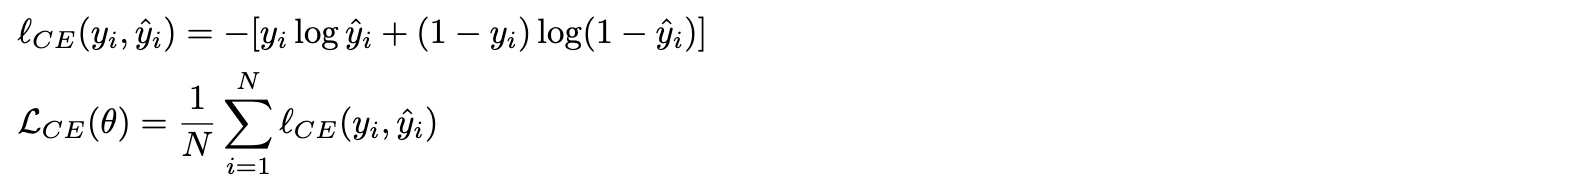

In [33]:
def logistic_loss(prediction: torch.Tensor, label: torch.Tensor) -> torch.Tensor:
    """
    Logistic loss function between a prediction and label.
    """
#     # your code here
#     raise NotImplementedError

    # Implement BCE on probabilities, but treat exact (p,y) ∈ {(1,1),(0,0)} as zero loss
    eps = 1e-12
    p = prediction
    y = label

    # mark perfect predictions to force exact zero contribution
    perfect = ((p == 1) & (y == 1)) | ((p == 0) & (y == 0))

    # clamp only for the non-perfect entries to avoid log(0) while preserving exact zeros
    p_safe = torch.where(p == 1, torch.tensor(1 - eps, dtype=p.dtype, device=p.device),
             torch.where(p == 0, torch.tensor(eps, dtype=p.dtype, device=p.device), p))

    elem_loss = -(y * torch.log(p_safe) + (1 - y) * torch.log(1 - p_safe))
    elem_loss = torch.where(perfect, torch.zeros_like(elem_loss), elem_loss)

    loss = elem_loss.mean()

    return loss

In [34]:
sample_input = torch.FloatTensor([[1,1],[0.0,0.0]])
sample_target = torch.FloatTensor([[1,1],[0,0]])
sample_output = logistic_loss(sample_input, sample_target)
assert sample_output.item() == 0.0

sample_input = torch.FloatTensor([[0.75,0.75]])
sample_target = torch.FloatTensor([[1,1]])
sample_output = logistic_loss(sample_input, sample_target)
assert sample_output.item() == 0.28768208622932434

### 6.6 - SGD Optimizer

We have already provided the implementation for the SGD optimizer. You may, however, try different optimizers referring to the docs provided.

In [35]:
def make_optimizer(model, learning_rate) -> torch.optim:
    """
    Returns an Stocastic Gradient Descent Optimizer
    See here for algorithms you can import: https://pytorch.org/docs/stable/optim.html
    """
    return torch.optim.SGD(model.parameters(), learning_rate)

### 6.7 - Converting Logits into Predictions
#### Exercise 9

Here you will conver the raw logits from the into binary prediction labels.

In [38]:
def predict(model, features):
    with torch.no_grad():
        """
        Implement the logic of converting the logits into prediction labels (0, 1). Return as a Python list.
        """
        logits = model(features)
#         # your code here
#         raise NotImplementedError

        probs = logits.squeeze(1)                      # shape: (N,)
        predicted_labels = (probs > 0.5).to(torch.float32).tolist()
        return predicted_labels

In [39]:
# Below module is only to be used for testing
class ModuleThatDoesNothing(torch.nn.Module):
    def __init__(self, input_dim: int):
        super().__init__()
        self.output_size = input_dim
        
    def forward(self, _input: torch.Tensor):
        # Return input without doing anything to it
        return _input

test_module = ModuleThatDoesNothing(1)
test_logits = torch.FloatTensor([[0.0]])
converted_logits = predict(test_module, test_logits)
assert converted_logits[0] == 0.0

test_logits = torch.FloatTensor([[0.49]])
converted_logits = predict(test_module, test_logits)
assert converted_logits[0] == 0.0

test_logits = torch.FloatTensor([[0.5]])
converted_logits = predict(test_module, test_logits)
assert converted_logits[0] == 0.0

test_logits = torch.FloatTensor([[0.51]])
converted_logits = predict(test_module, test_logits)
assert converted_logits[0] == 1.0

print('All Test Cases Passed!')

All Test Cases Passed!


### 6.8 - Training Function

See below the implementation of the training loop for our model.

In [40]:
from tqdm.autonotebook import tqdm
import random


def training_loop(
    num_epochs,
    batch_size,
    train_features,
    train_labels,
    dev_features,
    dev_labels,
    optimizer,
    model
):
    samples = list(zip(train_features, train_labels))
    random.shuffle(samples)
    batches = []
    for i in range(0, len(samples), batch_size):
        batches.append(samples[i:i+batch_size])
    print("Training...")
    for i in range(num_epochs):
        train_losses = []
        dev_losses = []
        for batch in tqdm(batches):
            # Empty the dynamic computation graph
            features, labels = zip(*batch)
            features = torch.stack(features)
            labels = torch.stack(labels)
            optimizer.zero_grad()
            # Run the model
            logits = model(features)
            # Compute loss
            loss = logistic_loss(torch.squeeze(logits), labels)
            # In this logistic regression example,
            # this entails computing a single gradient
            loss.backward()
            # Backpropogate the loss through our model
            
            # Update our coefficients in the direction of the gradient.
            optimizer.step()
             # For logging
            train_losses.append(loss.item())
            
            # Compute dev loss for our reference
            dev_logits = model(dev_features)
            dev_loss = logistic_loss(torch.squeeze(dev_logits), dev_labels)
            dev_losses.append(dev_loss.item())
        
        # Estimate the f1 score for the development set
        dev_f1 = f1_score(predict(model, dev_features), dev_labels.tolist())
        print(f"epoch {i}")
        print(f"Train loss: {sum(train_losses)/len(train_losses)}")
        print(f"Dev loss: {sum(dev_losses)/len(dev_losses)}")
        print(f"Dev F1 {dev_f1}")
        
    # Return the trained model
    return model

### 6.9 - Train the Classifier

Run the following cell to train a logistic regressor on your hand-engineered features.

In [41]:
num_epochs = 100

train_features, train_labels_tensor = featurize_data(train_texts, train_labels)
train_features = standardize(train_features)
dev_features, dev_labels_tensor = featurize_data(dev_texts, dev_labels)
dev_features = standardize(dev_features)
model = SentimentClassifier(train_features.shape[1]) 
optimizer = make_optimizer(model, learning_rate=0.01)

trained_model = training_loop(
    num_epochs,
    16,
    train_features,
    train_labels_tensor,
    dev_features,
    dev_labels_tensor,
    optimizer,
    model
)

Training...


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 0
Train loss: 0.7941388785839081
Dev loss: 0.7934892654418946
Dev F1 0.6666666666666666


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 1
Train loss: 0.7677475333213806
Dev loss: 0.7617881953716278
Dev F1 0.6666666666666666


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 2
Train loss: 0.7438914537429809
Dev loss: 0.73299720287323
Dev F1 0.6666666666666666


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 3
Train loss: 0.7222988843917847
Dev loss: 0.706824541091919
Dev F1 0.6666666666666666


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 4
Train loss: 0.7027156472206115
Dev loss: 0.6829932987689972
Dev F1 0.6666666666666666


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 5
Train loss: 0.6849086165428162
Dev loss: 0.6612465083599091
Dev F1 0.6666666666666666


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 6
Train loss: 0.6686677694320678
Dev loss: 0.6413496911525727
Dev F1 0.6666666666666666


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 7
Train loss: 0.6538061439990998
Dev loss: 0.6230920493602753
Dev F1 0.6666666666666666


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 8
Train loss: 0.640158885717392
Dev loss: 0.6062858164310455
Dev F1 0.6666666666666666


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 9
Train loss: 0.6275821685791015
Dev loss: 0.5907655477523803
Dev F1 0.7037037037037037


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 10
Train loss: 0.6159511148929596
Dev loss: 0.5763862788677215
Dev F1 0.8085106382978724


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 11
Train loss: 0.6051576137542725
Dev loss: 0.5630215108394623
Dev F1 0.8444444444444443


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 12
Train loss: 0.5951084107160568
Dev loss: 0.5505613029003144
Dev F1 0.8837209302325582


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 13
Train loss: 0.5857233285903931
Dev loss: 0.5389102637767792
Dev F1 0.9047619047619047


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 14
Train loss: 0.5769330501556397
Dev loss: 0.5279855966567993
Dev F1 0.9268292682926829


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 15
Train loss: 0.56867795586586
Dev loss: 0.5177154302597046
Dev F1 0.9268292682926829


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 16
Train loss: 0.5609064191579819
Dev loss: 0.5080373585224152
Dev F1 0.9268292682926829


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 17
Train loss: 0.5535737246274948
Dev loss: 0.4988970190286636
Dev F1 0.9268292682926829


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 18
Train loss: 0.5466409474611282
Dev loss: 0.49024686217308044
Dev F1 0.9268292682926829


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 19
Train loss: 0.5400740683078766
Dev loss: 0.482045179605484
Dev F1 0.9268292682926829


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 20
Train loss: 0.5338433146476745
Dev loss: 0.47425546050071715
Dev F1 0.9268292682926829


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 21
Train loss: 0.5279223769903183
Dev loss: 0.4668452560901642
Dev F1 0.9268292682926829


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 22
Train loss: 0.5222878873348236
Dev loss: 0.4597858995199203
Dev F1 0.9268292682926829


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 23
Train loss: 0.516919219493866
Dev loss: 0.4530518174171448
Dev F1 0.9268292682926829


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 24
Train loss: 0.5117977172136307
Dev loss: 0.4466201364994049
Dev F1 0.9268292682926829


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 25
Train loss: 0.5069068372249603
Dev loss: 0.44047040343284605
Dev F1 0.9


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 26
Train loss: 0.5022315561771393
Dev loss: 0.4345841288566589
Dev F1 0.9


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 27
Train loss: 0.497758162021637
Dev loss: 0.4289444833993912
Dev F1 0.9


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 28
Train loss: 0.49347427785396575
Dev loss: 0.42353624999523165
Dev F1 0.9


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 29
Train loss: 0.4893686532974243
Dev loss: 0.4183455467224121
Dev F1 0.9


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 30
Train loss: 0.4854308545589447
Dev loss: 0.413359722495079
Dev F1 0.9230769230769231


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 31
Train loss: 0.48165133893489837
Dev loss: 0.4085670530796051
Dev F1 0.9230769230769231


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 32
Train loss: 0.47802130579948426
Dev loss: 0.40395682752132417
Dev F1 0.9230769230769231


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 33
Train loss: 0.47453261613845826
Dev loss: 0.3995190769433975
Dev F1 0.9230769230769231


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 34
Train loss: 0.4711777001619339
Dev loss: 0.3952446699142456
Dev F1 0.9230769230769231


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 35
Train loss: 0.4679495841264725
Dev loss: 0.39112505614757537
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 36
Train loss: 0.46484171152114867
Dev loss: 0.387152361869812
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 37
Train loss: 0.46184803247451783
Dev loss: 0.3833191841840744
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 38
Train loss: 0.45896281599998473
Dev loss: 0.37961863577365873
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 39
Train loss: 0.4561807543039322
Dev loss: 0.37604430317878723
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 40
Train loss: 0.4534968286752701
Dev loss: 0.37259008288383483
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 41
Train loss: 0.45090641677379606
Dev loss: 0.3692503869533539
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 42
Train loss: 0.4484050840139389
Dev loss: 0.3660199403762817
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 43
Train loss: 0.4459887474775314
Dev loss: 0.36289370656013487
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 44
Train loss: 0.4436534583568573
Dev loss: 0.359867000579834
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 45
Train loss: 0.4413955271244049
Dev loss: 0.3569354087114334
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 46
Train loss: 0.4392115443944931
Dev loss: 0.3540946513414383
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 47
Train loss: 0.4370982199907303
Dev loss: 0.35134094059467313
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 48
Train loss: 0.4350524812936783
Dev loss: 0.348670506477356
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 49
Train loss: 0.4330714225769043
Dev loss: 0.346079820394516
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 50
Train loss: 0.43115229308605196
Dev loss: 0.3435655295848846
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 51
Train loss: 0.429292431473732
Dev loss: 0.34112455546855924
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 52
Train loss: 0.4274894595146179
Dev loss: 0.33875387012958524
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 53
Train loss: 0.4257409155368805
Dev loss: 0.3364506185054779
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 54
Train loss: 0.42404468953609464
Dev loss: 0.3342120945453644
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 55
Train loss: 0.422398579120636
Dev loss: 0.3320357948541641
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 56
Train loss: 0.4208006262779236
Dev loss: 0.32991926968097685
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 57
Train loss: 0.4192489251494408
Dev loss: 0.3278602033853531
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 58
Train loss: 0.4177416518330574
Dev loss: 0.32585641741752625
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 59
Train loss: 0.4162771120667458
Dev loss: 0.32390580177307127
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 60
Train loss: 0.4148536130785942
Dev loss: 0.32200637757778167
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 61
Train loss: 0.4134696677327156
Dev loss: 0.3201562285423279
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 62
Train loss: 0.4121237576007843
Dev loss: 0.31835359036922456
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 63
Train loss: 0.4108144357800484
Dev loss: 0.3165966898202896
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 64
Train loss: 0.4095404103398323
Dev loss: 0.3148839145898819
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 65
Train loss: 0.40830032229423524
Dev loss: 0.3132136970758438
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 66
Train loss: 0.4070930272340775
Dev loss: 0.3115845113992691
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 67
Train loss: 0.40591728389263154
Dev loss: 0.3099949359893799
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 68
Train loss: 0.40477203130722045
Dev loss: 0.3084436297416687
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 69
Train loss: 0.4036561563611031
Dev loss: 0.3069292426109314
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 70
Train loss: 0.4025686874985695
Dev loss: 0.3054505854845047
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 71
Train loss: 0.40150860846042635
Dev loss: 0.30400640368461607
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 72
Train loss: 0.4004749745130539
Dev loss: 0.30259555876255034
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 73
Train loss: 0.3994668900966644
Dev loss: 0.30121696889400484
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 74
Train loss: 0.39848353117704394
Dev loss: 0.2998695373535156
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 75
Train loss: 0.39752407670021056
Dev loss: 0.2985523074865341
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 76
Train loss: 0.3965876862406731
Dev loss: 0.2972642958164215
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 77
Train loss: 0.39567366391420367
Dev loss: 0.29600456058979036
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 78
Train loss: 0.39478124380111695
Dev loss: 0.2947722226381302
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 79
Train loss: 0.3939097598195076
Dev loss: 0.2935664117336273
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 80
Train loss: 0.3930585771799088
Dev loss: 0.29238635301589966
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 81
Train loss: 0.3922269806265831
Dev loss: 0.29123117923736574
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 82
Train loss: 0.39141441583633424
Dev loss: 0.2901002198457718
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 83
Train loss: 0.3906202703714371
Dev loss: 0.28899270594120025
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 84
Train loss: 0.38984396159648893
Dev loss: 0.28790789246559145
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 85
Train loss: 0.3890849858522415
Dev loss: 0.2868451505899429
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 86
Train loss: 0.38834278434515
Dev loss: 0.28580382168293
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 87
Train loss: 0.3876168832182884
Dev loss: 0.28478331565856935
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 88
Train loss: 0.3869067817926407
Dev loss: 0.28378299474716184
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 89
Train loss: 0.38621202409267424
Dev loss: 0.2828022867441177
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 90
Train loss: 0.3855321377515793
Dev loss: 0.28184066116809847
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 91
Train loss: 0.3848667398095131
Dev loss: 0.28089756667613985
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 92
Train loss: 0.38421537429094316
Dev loss: 0.2799724847078323
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 93
Train loss: 0.3835776597261429
Dev loss: 0.27906492352485657
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 94
Train loss: 0.3829531744122505
Dev loss: 0.27817436754703523
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 95
Train loss: 0.3823415756225586
Dev loss: 0.2773003727197647
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 96
Train loss: 0.38174251466989517
Dev loss: 0.27644251883029936
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 97
Train loss: 0.3811556100845337
Dev loss: 0.2756003439426422
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 98
Train loss: 0.3805805891752243
Dev loss: 0.274773433804512
Dev F1 0.8947368421052632


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 99
Train loss: 0.3800170347094536
Dev loss: 0.27396138608455656
Dev F1 0.8947368421052632


# 7 - Predict on the Test Set
### Exercise 10
Now, let's see how our model did. We'll predict using the trained model and print the F1 score.

Test the results you achieve with the two baselines by running the following cells:

In [42]:
### DEV SET RESULTS - RANDOM CHANCE

devset_prediction_random = predict_random(train_labels, num_samples=len(dev_labels))
dev_random_f1 = f1_score(devset_prediction_random, dev_labels)
print('Random Chance F1:', dev_random_f1)

assert dev_random_f1 > 0

print('All Test Cases Passed!')

Random Chance F1: 0.631578947368421
All Test Cases Passed!


In [43]:
### DEV SET RESULTS - LOGISTIC REGRESSION

dev_features, dev_labels = featurize_data(dev_texts, dev_labels)
dev_features = standardize(dev_features)
dev_logistic_accuracy = accuracy(predict(trained_model, dev_features), dev_labels.tolist())
dev_logistic_f1 = f1_score(predict(trained_model, dev_features), dev_labels.tolist())
print('Logistic Regression Results:')
print('Accuracy:', dev_logistic_accuracy)
print('F1-score', dev_logistic_f1)

assert dev_logistic_accuracy > 0.8
assert dev_logistic_f1 > 0.8
print('All Test Cases Passed!')

Logistic Regression Results:
Accuracy: 0.8947368421052632
F1-score 0.8947368421052632
All Test Cases Passed!


In [44]:
### TEST SET RESULTS - RANDOM CHANCE
### Run the below code to test our random classifier on the hidden test set

print("Testing on the hidden test set...")


Testing on the hidden test set...


In [45]:
### TEST SET RESULTS - LOGISTIC REGRESSION
### Run the below code to test our logistic regression classifier on the hidden test set

print("Testing on the hidden test set...")


Testing on the hidden test set...
